In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\IT\Desktop\saranya\public health awareness.csv")
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [22]:
if data.isnull().sum().sum() == 0 :
    print ('There is no missing data in our dataset')
else:
    print('There is {} missing data in our dataset '.format(data.isnull().sum().sum()))

There is 1892 missing data in our dataset 


In [23]:
frame = pd.concat([data.isnull().sum(), data.nunique(), data.dtypes], axis = 1, sort= False)
frame

,0,1,2
Timestamp,0,1246,object
Age,0,53,int64
Gender,0,49,object
Country,0,48,object
state,515,45,object
self_employed,18,2,object
family_history,0,2,object
treatment,0,2,object
work_interfere,264,4,object
no_employees,0,6,object


In [26]:

from sklearn.impute import SimpleImputer

data = data.drop(columns=['state', 'comments', 'Timestamp', ])
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ['Gender', 'Country', 'self_employed','family_history', 'treatment', 'work_interfere','no_employees',
                             'remote_work', 'tech_company','benefits','care_options', 'wellness_program',
                             'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                             'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview',
                             'mental_vs_physical', 'obs_consequence']
for columns in columns_to_encode:
    data[columns] = le.fit_transform(data[columns])
    
data.info()
data['work_interfere'] = SimpleImputer(strategy = 'most_frequent').fit_transform(data['work_interfere'].values.reshape(-1,1))
data['self_employed'] = SimpleImputer(strategy = 'most_frequent').fit_transform(data['self_employed'].values.reshape(-1,1))

data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


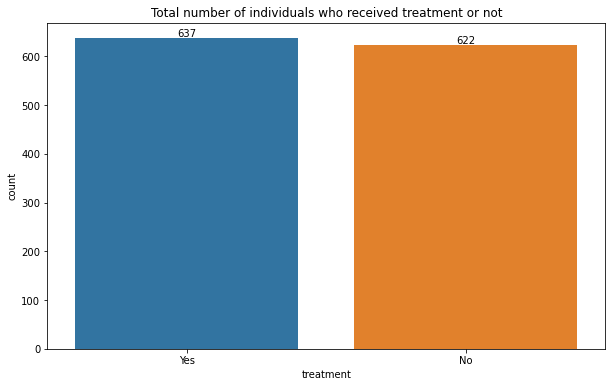

In [34]:
plt.figure(figsize = (10,6));
treat = sns.countplot(data = data,  x = 'treatment');
treat.bar_label(treat.containers[0]);
plt.title('Total number of individuals who received treatment or not');


In [35]:
data['Age'].unique()

array([ 3.700e-10,  4.400e-10,  3.200e-10,  3.100e-10,  3.300e-10,
        3.500e-10,  3.900e-10,  4.200e-10,  2.300e-10,  2.900e-10,
        3.600e-10,  2.700e-10,  4.600e-10,  4.100e-10,  3.400e-10,
        3.000e-10,  4.000e-10,  3.800e-10,  5.000e-10,  2.400e-10,
        1.800e-10,  2.800e-10,  2.600e-10,  2.200e-10,  1.900e-10,
        2.500e-10,  4.500e-10,  2.100e-10, -2.900e-10,  4.300e-10,
        5.600e-10,  6.000e-10,  5.400e-10,  3.290e-09,  5.500e-10,
        1.000e+00,  4.800e-10,  2.000e-10,  5.700e-10,  5.800e-10,
        4.700e-10,  6.200e-10,  5.100e-10,  6.500e-10,  4.900e-10,
       -1.726e-08,  5.000e-11,  5.300e-10,  6.100e-10,  8.000e-11,
        1.100e-10, -1.000e-11,  7.200e-10])

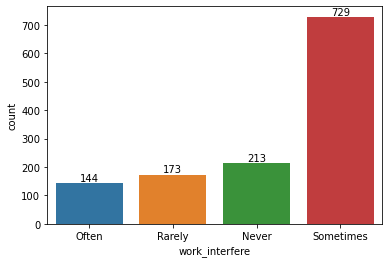

In [36]:
ax = sns.countplot(data=data, x='work_interfere');
ax.bar_label(ax.containers[0]);

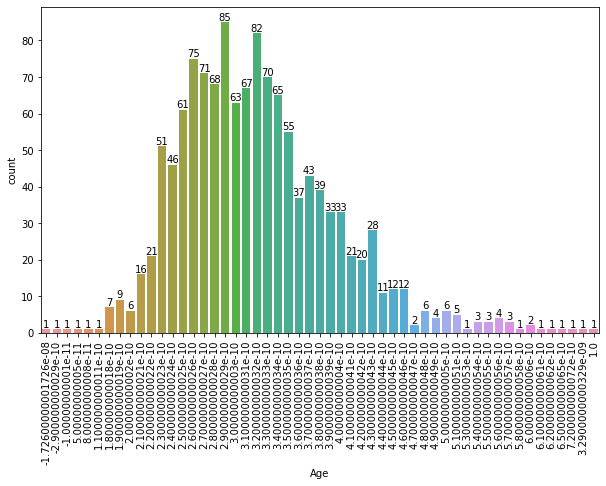

In [37]:
plt.figure(figsize = (10,6))
age_range_plot = sns.countplot(data = data, x = 'Age');
age_range_plot.bar_label(age_range_plot.containers[0]);
plt.xticks(rotation=90);
